# Introduction
In a series of weekly articles, I will be covering some important topics of statistics with a twist.

The goal is to use Python to help us get intuition on complex concepts, empirically test theoretical proofs, or build algorithms from scratch. In this series, you will find articles covering topics such as random variables, sampling distributions, confidence intervals, significance tests, and more.

At the end of each article, you can find exercises to test your knowledge. The solutions will be shared in the article of the following week.

Articles published so far:
- [Bernoulli and Binomial Random Variables with Python](https://towardsdatascience.com/bernoulli-and-binomial-random-variables-d0698288dd36)
- [From Binomial to Geometric and Poisson Random Variables with Python](https://towardsdatascience.com/geometric-and-poisson-random-variables-with-python-e5dcb63d6b55)
- [Sampling Distribution of a Sample Proportion with Python](https://towardsdatascience.com/sampling-distributions-with-python-f5a5f268f636)
- [Confidence Intervals with Python](https://towardsdatascience.com/confidence-intervals-with-python-bfa28ebb81c)
- [Significance Tests with Python](https://towardsdatascience.com/significance-or-hypothesis-tests-with-python-7ed35e9ac9b6)
- [Two-sample Inference for the Difference Between Groups with Python](https://towardsdatascience.com/two-sample-inference-for-the-difference-between-groups-with-python-de91fbee32f9)
- [Inference for Categorical Data](https://towardsdatascience.com/inference-for-categorical-data-9f3c6034aa57)
- Advanced Regression

As usual the code is available on my [GitHub](https://github.com/luisroque/College_Statistics_with_Python).

# Inference about Slope in Linear Regression

Imagine that you want to predict the salary of a Data Scientist based on the number of years he has been coding. To be able to build this relationship, we can sample 20 random people from the population of Data Scientists and plot the relationship (notice that the salary unit  is 10,000€). At the same time we can calculate the line of best fit.

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, chi2

In [281]:
salaries = [[4, 5.5, 3.5, 6, 7, 9, 3.4, 5.3, 4.3, 5.3, 6, 6.2, 6.5, 7, 7.1, 4.3, 5.2, 5, 5.7, 3.2]]
yearsCoding = [[2, 5, 1, 4, 5, 10, 2, 2, 4, 3, 4, 6, 5, 6, 7, 4, 3, 4, 4, 3]]
n = 20

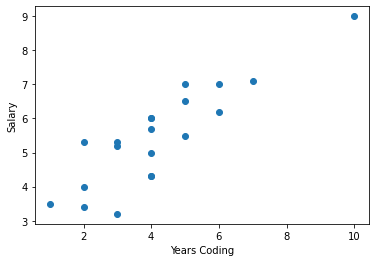

In [282]:
plt.scatter(yearsCoding[0], salaries[0])
plt.xlabel('Years Coding')
plt.ylabel('Salary');

The line of best fit can be calculated by minimizing the squared distance between the data points and the line. The equation for the regression line is the following:

$$\begin{align}
\hat y = b \cdot X + a ,
\end{align}$$

where $b$ is the slope and $a$ is the intercept of the regression line. Notice that by calculating this line for our data, we are calculating the line of best fit for a single sample of 20 Data Scientists. We could calculate a different line of best fit for a different sample that we took from our population. This happens because we are estimating parameters for a population. In the case that you could get the salaries and number of years coding for all the Data Scientists in the world to build your model, you would be estimating the true population parameters. In that case we replace $a$ and $b$ by $\alpha$ and $\beta$:

$$\begin{align}
\hat y = \beta \cdot X + \alpha
\end{align}$$

Since we are using samples to estimate the population parameters, we can make inferences based on those samples. With that in mind, we know that $b$ will not be exactly equal to $\beta$, but can we say that there is a positive linear relationship or a non-zero linear relationship between salaries and years of coding? As a matter of fact we can do it by defining a confidence interval around this statistic. This way we will have a good sense of where the true parameter might actually be. In previous articles we saw how to compute such interval: we subtract/add the critical value $t^*$ multiplied by the standard error of b.

$$\begin{align}
b \pm t^* SE_b
\end{align}$$

In the same way, we could define a hypothesis test for the slope parameter. One that states that there is no relationship between the variables as a null hypothesis and, as the alternative, that there is a relationship between the variables (you could also be more specific and define the alternative hypothesis as considering only a positive linear relationship between the variables).

$$\begin{align}
H_0: \beta = 0 \\
H_1: \beta \neq 0
\end{align}$$

As in any other inference procedure we must respect the conditions to assure that the results that we get are valid. In this case, for the slope of a linear regression we must ensure that:
* The data must be randomly generated;
* The individual observations should be independent (or approximately independent - remember the 10% rule);
* The relationship between the variables must be a linear relationship;
* For any given x in the population, the distribution of y must be normal;
* The variance should be constant for any given x.

# Fitting a Regression Line from Scratch

We already defined our equation for the regression line, now we need to define our cost function and a method to update our parameters. For our cost function we will be using the Mean Squared Error:

$$MSE = J(a, b) = \frac{1}{N} \sum^n_{i=1}(y_i-(b x_i + a))^2$$

To update our parameters we will be using gradient descent. I will not cover in depth the method, I just want to give some intuition. The first step is to compute the gradient of the cost function with respect to each parameter:

$$\begin{align}
\frac{\partial}{\partial a} {J} = \frac{1}{N}\sum -2(y_i - (b x_i + a)) \\
\frac{\partial}{\partial b} {J} = \frac{1}{N}\sum -2 x_i(y_i - (b x_i + a)) 
\end{align}$$

Then we update the parameters accordingly:

$$\begin{align}
a = a - \alpha \cdot da \\
b = b - \alpha \cdot db,
\end{align}$$

where $\alpha$ represents the learning rate.

In [283]:
def fit_lr(X, y, num_iter=1000, lr=0.01):
    n_samples = X.shape[0]
    slope = 0
    intercept = 0

    for _ in range(num_iter):
        y_predicted = np.dot(X, slope) + intercept

        ds = (1/n_samples) * np.dot(X.T, (y_predicted - y))
        di = (1/n_samples) * np.sum(y_predicted - y)

        slope -= lr * ds
        intercept -= lr * di
        
    return (slope, intercept)

In [284]:
slope, intercept = fit_lr(np.array(yearsCoding[0]), np.array(salaries[0]))

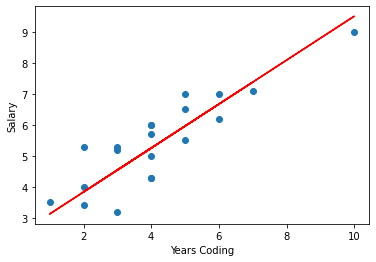

In [285]:
plt.scatter(yearsCoding[0], salaries[0])
plt.xlabel('Years Coding')
plt.ylabel('Salary')
plt.plot(yearsCoding[0],slope*np.array(yearsCoding[0]) + intercept, color='r');

In [286]:
print('Slope=' + str(slope))
print('Intercept=' + str(intercept))

Slope=0.7096702503648314
Intercept=2.4147010493601404


What would be the salary of a Data Scientist that codes for 15 years?

In [287]:
slope * 15 + intercept

13.059754804832611

It would be around 130,000€.

# Confidence Interval of the Slope

We can treat the slope $\hat b$ as a normally distributed random variable with a mean of $b$ and a variance equal to $\sigma^2$ divided by the sum of squares of X.

$$
\hat b \sim \mathcal{N}(b, \frac{\sigma^2}{SS_{xx}})$$

As we do not know the population variance, we use the sampling variance to calculate the Standard Error (SE):

$$SE_{\hat b} = \frac{ \sqrt{\frac{\sum{(y_i - \hat y)}^2}{n-2}}}{\sqrt{SS_{xx}}}$$

We can describe the SE as the standard deviation of the sampling distribution of the slope of the regression line.

In [288]:
SS_xx = np.sum((np.array(yearsCoding[0]) - np.mean(np.array(yearsCoding[0])))**2)
SS_xx

79.20000000000002

In [289]:
SE_b = (np.sqrt(np.sum((np.array(salaries[0])-(np.array(yearsCoding[0])*slope+intercept))**2)/(n-2))) / np.sqrt(SS_xx)
SE_b

0.08687984291368046

We can finally calculate the 95% confidence interval for the slope of our linear regression.

In [290]:
print('95% Confidence interval=[' + str(np.round(slope - t.ppf(0.975, df=n-2)*SE_b,2)) + ',' + str(np.round(slope + t.ppf(0.975, df=n-2)*SE_b,2)) + ']')

95% Confidence interval=[0.53,0.89]


Recall that a 95% confidence interval means that the true slope is contained in our confidence intervals 95% of the times.

We can use this interval to test the following hypothesis at the $\alpha = 0.05$ level of significance:

$$\begin{align}
H_0: \beta = 0 \\
H_1: \beta \neq 0
\end{align}$$

What can we conclude then? Assuming that $H_0$ is true, we are facing the situation where $\beta$ does not overlaps with the 95% interval and that happens with probability less than 5%. Thus, we reject $H_0$ and accept the suggested $H_1$. It states that there is some relationship (non-zero) between number of years coding and the salary of a Data Scientist.

# Nonlinear Regression

Now, suppose that the relationship between the salary of a Data Scientist and the number of years of coding is not linear. In this case we see that it is closer to an exponential relationship. What happens if we try to fit a line to these data?

In [291]:
salaries =    [[3.5, 7.5, 2.5, 7, 9, 40, 3.4, 4.3, 5.3, 5.3, 4, 12.2, 8.5, 10, 18.1, 4.3, 5.2, 5, 5.7, 5.2]]
yearsCoding = [[2, 5,   1  , 4, 5, 10, 2  , 2  , 4,   3  , 4, 6  , 5  , 6 , 7   , 4   , 3  , 4, 4  , 3  ]]
n = 20

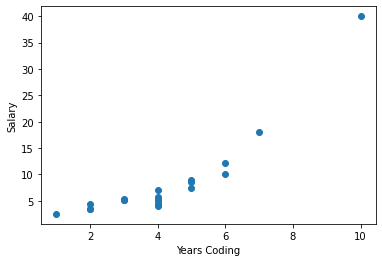

In [292]:
plt.scatter(yearsCoding[0], salaries[0])
plt.xlabel('Years Coding')
plt.ylabel('Salary');

In [293]:
slope, intercept = fit_lr(np.array(yearsCoding[0]), np.array(salaries[0]))

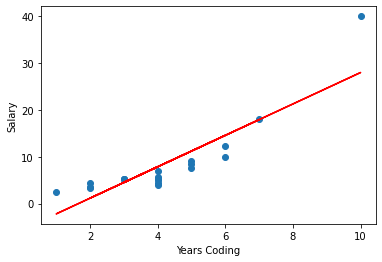

In [294]:
plt.scatter(yearsCoding[0], salaries[0])
plt.xlabel('Years Coding')
plt.ylabel('Salary')
plt.plot(yearsCoding[0],slope*np.array(yearsCoding[0]) + intercept, color='r');

In [295]:
print('Slope=' + str(slope))
print('Intercept=' + str(intercept))

Slope=3.35501894004377
Intercept=-5.5729005963397205


We see that the line that we fit does not explain the data at all. We even get a negative salary for someone that just started coding and we would heavily underestimate the salary of someone that codes for 10 years. We have two options here. The first is to fit an exponential line to the data. The problem with this approach is that we lose the tools that we have been developing to fit and analyze a linear relationship between two variables. On the other hand, we can transform our data prior to fit the regression line.

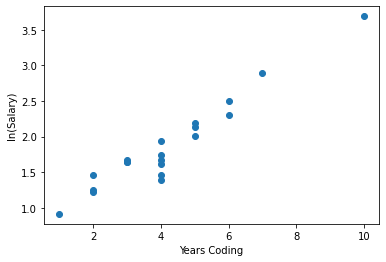

In [296]:
plt.scatter(yearsCoding[0], np.log(salaries[0]))
plt.xlabel('Years Coding')
plt.ylabel('ln(Salary)');

In [297]:
slope, intercept = fit_lr(np.array(yearsCoding[0]), np.log(np.array(salaries[0])))

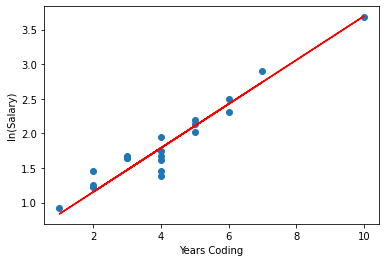

In [298]:
plt.scatter(yearsCoding[0], np.log(salaries[0]))
plt.xlabel('Years Coding')
plt.ylabel('ln(Salary)')
plt.plot(yearsCoding[0],slope*np.array(yearsCoding[0]) + intercept, color='r');

In [299]:
print('Slope=' + str(slope))
print('Intercept=' + str(intercept))

Slope=0.3173211894646696
Intercept=0.5195321580809141


With the transformation we see that the line of best fit actually explains the relationship between the variable years of coding and the transformed variable salary. But notice that the relationship between the original variables is not linear, but seems to be exponential.

What would be the salary of a Data Scientist that codes for 15 years in this scenario?

In [300]:
np.exp(slope * 15+intercept)

196.24227641696947

It would be almost 2M€! Compare it with the result from the linear dataset that we used before.

# Conclusion

This article covered how to solve a linear regression problem and then 
use our line of best fit to make inferences about our parameters. In this case we focus on the slope parameter, using confidence intervals and hypothesis testing to evaluate the type of association between two variables of interest. Finally, we introduced the concept of transforming variables to deal with the fact that the data can have nonlinear patterns.

# Exercises

You will get the solutions in next week's article.

1. Márcia collected data on the battery life and price of a random sample of Portable Computers. Based on the data presented below, what is the test statistic for the null hypothesis that the population slope is 0? 

2. Rui obtained a random sample of colleagues at work and noticed a positive linear relationship between their ages and the number of kilometers they said they walked yesterday. A 95%, percent confidence interval for the slope of the regression line was (15.4, 155.2). Rui wants to use this interval to test $H_0: \beta=0$ vs. $H_1: \beta \neq 0$ at the 5% level of significance. Assume that all conditions for inference have been met. What should Rui conclude?

### Answers from last week

1. According to a distributor of surf boards, 66% of the boards are common, 25% are uncommon, and 9% are rare. José wondered if the rarity levels of the boards he and his friends owned followed this distribution, so he took a random sample of 500 boards and recorded their rarity levels. The results are presented in the table below. Carry out a goodness-of-fit test to determine if the distribution of rarity levels of surf boards José and his friends own disagrees with the claimed percentages.

In [301]:
table = [['Cards', 345, 125, 30]]
alpha = 0.05
df = pd.DataFrame(table)
df.columns = ['Rarity level', 'Common', 'Uncommon', 'Rare']
df = df.set_index('Rarity level')
df

,Common,Uncommon,Rare
Rarity level,,,
Cards,345,125,30


In [302]:
arr = df.to_numpy()

arr = np.concatenate((arr, (np.sum(arr)*np.asarray([0.66, 0.25, 0.09])).reshape(1,-1)))

In [303]:
chi_sq_statistic = np.sum((arr[0]-arr[1])**2/arr[1])
chi_sq_statistic

5.681818181818182

In [304]:
print('P-value = ' + str(np.round(1-chi2.cdf(chi_sq_statistic, df =2), 4)))

P-value = 0.0584


In [305]:
if 1-chi2.cdf(chi_sq_statistic, df =2) < alpha:
    print('Reject H_0')
else:
    print('Fail to reject H_0')

Fail to reject H_0
